#US Airline Sentiment Dataset
dataset from https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

Hand labeled info on positive, netural or negative sentiment. We will simply try and predict whether its negative or not.

In [126]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [127]:
import pandas as pd
df = pd.read_csv('Tweets.csv')

In [128]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


We dont need most of this, lets simplify it.
We will remove all but the sentiment column and text collumn, and change it so sentiment either holds 1 for negative or 0 for anything else

In [129]:
# Select only the 'airline_sentiment' and 'text' columns
df = df[['airline_sentiment', 'text']]

# Remove any columns that have null values
df = df.dropna(axis=1)

# Map 'negative' to 1 and everything else to 0 in the 'airline_sentiment' column
# Change the values in the 'airline_sentiment' column
df.loc[df['airline_sentiment'] == 'negative', 'airline_sentiment'] = 1
df.loc[df['airline_sentiment'] != 1, 'airline_sentiment'] = 0
df['airline_sentiment'] = df['airline_sentiment'].astype(int)
df.head()


,airline_sentiment,text
0,0,@VirginAmerica What @dhepburn said.
1,0,@VirginAmerica plus you've added commercials t...
2,0,@VirginAmerica I didn't today... Must mean I n...
3,1,@VirginAmerica it's really aggressive to blast...
4,1,@VirginAmerica and it's a really big bad thing...


In [130]:
df.shape

(14640, 2)

In [131]:
num_ones = (df['airline_sentiment'] == 1).sum()
num_non_ones = (df['airline_sentiment'] != 1).sum()
print(f'Number of negative tweets: {num_ones}')
print(f'Number of not negative tweets: {num_non_ones}')
print(num_ones/14640)

Number of negative tweets: 9178
Number of not negative tweets: 5462
0.6269125683060109


#Graphs: 0 is neutral/positive, 1 is negative.

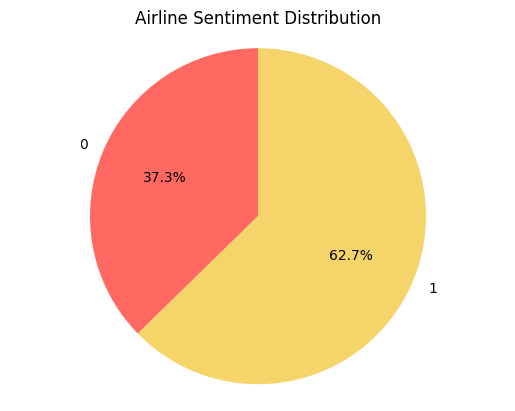

In [134]:
import matplotlib.pyplot as plt
# Group the data by airline_sentiment and count the number of occurrences
sentiment_counts = df.groupby('airline_sentiment').size()

# Create a pie chart of the sentiment distribution
labels = [0, 1]
colors = ['#FF6961', '#F5D469']
plt.pie(sentiment_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Airline Sentiment Distribution')
plt.show()

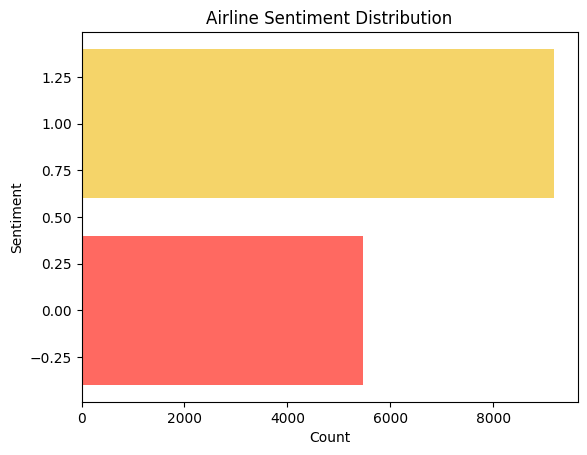

In [136]:
sentiment_counts = df['airline_sentiment'].value_counts()

fig, ax = plt.subplots()

ax.barh(sentiment_counts.index, sentiment_counts.values, color=['#F5D469', '#FF6961'])

ax.set_xlabel('Count')
ax.set_ylabel('Sentiment')
ax.set_title('Airline Sentiment Distribution')

plt.show()

# Naive Bayes 





### Preprocessing

here we remove stop words and transform to TFIDF


In [61]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = (stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
# set up X and y
X = df.text
y = df.airline_sentiment

In [63]:
# take a peek at X
X.head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [64]:
# look at y
y[:10]

0    0
1    0
2    0
3    1
4    1
5    1
6    0
7    0
8    0
9    0
Name: airline_sentiment, dtype: int64

### train and test sets

Split the data into train and test sets, with 20% of the data going to the test set.

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

X_train.shape

(11712,)

In [83]:
# apply tfidf vectorizer
X_train = vectorizer.fit_transform(X_train)  # fit and transform the train data
X_test = vectorizer.transform(X_test)        # transform only the test data


In [84]:
# take a peek at the data
# this is a very sparse matrix because most of the 8613 words don't occur in each sms message

print('train size:', X_train.shape)
print(X_train.toarray()[:5])

print('\ntest size:', X_test.shape)
print(X_test.toarray()[:5])

train size: (11712, 13032)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

test size: (2928, 13032)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## train the naive bayes classifier

Here I use the training settings the same as were used in the example in the github.


In [68]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [69]:
# priors
import math
prior_p = sum(y_train == 1)/len(y_train)
print('prior Negative:', prior_p, 'log of prior:', math.log(prior_p))

# the model prior matches the prior calculated above
naive_bayes.class_log_prior_[1]

prior Negative: 0.6259392076502732 log of prior: -0.4685020249775062


-0.46850202497750537

In [70]:
# what else did it learn from the data?
# the log likelihood of words given the class

naive_bayes.feature_log_prob_

array([[-10.11742029,  -8.88825948,  -9.73222016, ...,  -9.71411634,
        -10.11742029, -10.11742029],
       [ -8.94729965,  -8.71174617, -10.47904627, ..., -10.47904627,
        -10.14969511, -10.14863553]])


## evaluate on the test data

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# make predictions on the test data
pred = naive_bayes.predict(X_test)

# print confusion matrix
print(confusion_matrix(y_test, pred))


[[ 475  606]
 [  35 1812]]


In [76]:
# confusion matrix has this form
#     (Non Negative and identified)   (Falsely identified as negative)
#     (Missed negative)   (correctly identified as negative)


In [73]:
print('accuracy score: ', accuracy_score(y_test, pred))
      
print('\nprecision score (Not negative): ', precision_score(y_test, pred, pos_label=0))
print('precision score (negative): ', precision_score(y_test, pred))

print('\nrecall score: (not negative)', recall_score(y_test, pred, pos_label=0))
print('recall score: (negative)', recall_score(y_test, pred))
      
print('\nf1 score: ', f1_score(y_test, pred))

accuracy score:  0.7810792349726776

precision score (Not negative):  0.9313725490196079
precision score (negative):  0.749379652605459

recall score: (not negative) 0.43940795559666973
recall score: (negative) 0.9810503519220357

f1 score:  0.849706916764361


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.44      0.60      1081
           1       0.75      0.98      0.85      1847

    accuracy                           0.78      2928
   macro avg       0.84      0.71      0.72      2928
weighted avg       0.82      0.78      0.76      2928



How good is our accuracy?

In the data set, there are 9178 negative tweets, calculated earlied to be       .6269125683060109 of the dataset. We guessed correctly78% of the time, so clearly we are onto somthing. We performed very poorly on the neutral and positive tweets, as we have lots of false positives.

In [78]:
print('Non-Negative size in test data:',y_test[y_test==0].shape[0])
print('test size: ', len(y_test))
baseline = y_test[y_test==0].shape[0] / y_test.shape[0] 
print(baseline)

Non-Negative size in test data: 1081
test size:  2928
0.36919398907103823


Examine some wrong classificataions.

In [79]:
y_test[y_test != pred]

6153     0
8529     0
13815    0
3914     1
4227     0
        ..
8126     0
6677     0
1431     0
1301     0
1439     0
Name: airline_sentiment, Length: 641, dtype: int64

In [81]:
for i in [6153, 8529, 13815, 3914, 4227, 8126, 6677]:
    print(df.loc[i])

airline_sentiment                                                    0
text                 @SouthwestAir I dunno my travel information.. ...
Name: 6153, dtype: object
airline_sentiment                                                    0
text                 @JetBlue Left my coat on flight 453 this morni...
Name: 8529, dtype: object
airline_sentiment                                                    0
text                 @AmericanAir  my fly is 1579  if do you have s...
Name: 13815, dtype: object
airline_sentiment                                                    1
text                 @united &lt;&lt;&lt;&lt;&lt;------- shoddy cus...
Name: 3914, dtype: object
airline_sentiment                                                    0
text                 @united No, not received any e-mails in either...
Name: 4227, dtype: object
airline_sentiment                                                    0
text                 @JetBlue you guys get rid of the hip hop stati...
Name: 8126, dtype

#### analysis

THe pattern seems to be that any message containing a 'no' in it gets classified as negative. This is not somthing I can easily fix, as in general it is a useful indicator.


#Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
#We must reset our train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

X_train.shape

(11712,)

In [86]:
# tfidf vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=2)

X_train = vectorizer.fit_transform(X_train)  # fit and transform the train data
X_test = vectorizer.transform(X_test)        # transform only the test data

In [87]:
clf = LogisticRegression(C=2.5, n_jobs=4, solver='lbfgs', random_state=17, verbose=1)
clf.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    2.8s finished


LogisticRegression(C=2.5, n_jobs=4, random_state=17, verbose=1)

In [88]:
pred2 = clf.predict(X_test)

In [89]:
confusion_matrix(y_test, pred2)

array([[ 775,  306],
       [ 142, 1705]])

In [90]:
accuracy_score(y_test, pred2)

0.8469945355191257

In [91]:
f1_score(y_test, pred2)

0.8838776568170037

This performs notably better than the previous method of Naive bayes; It rose nearly 5% in accuracy.  Way better than the 62% that could be expected of the utterly naiive method of always picking negative. It still tends to hit more false positives.

In [92]:
y_test[y_test != pred]

6153     0
8529     0
13815    0
3914     1
4227     0
        ..
8126     0
6677     0
1431     0
1301     0
1439     0
Name: airline_sentiment, Length: 641, dtype: int64

#Neural Networks

In [110]:
vectorizer = TfidfVectorizer(stop_words=stopwords, binary=True)
X = vectorizer.fit_transform(df.text)
y = df.airline_sentiment

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

X_train.shape

(11712, 14912)

In [120]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(30, 5), random_state=10)
classifier.fit(X_train, y_train) 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(30, 5), random_state=10,
              solver='lbfgs')

In [121]:
pred3 = classifier.predict(X_test)

In [122]:
confusion_matrix(y_test, pred3)

array([[ 757,  324],
       [ 323, 1524]])

In [123]:
accuracy_score(y_test, pred3)

0.7790300546448088

In [124]:
f1_score(y_test, pred2)

0.8838776568170037

In [125]:
#This initially got a lower score than logistic regression, however, on the initial NN shape of hidden nodes 15, 2 it always guessed just negative. This was a massive improvement.

NN seems to do better the more layers you throw at it, going from 60% accuracy to 77% when i caled up by a factor of ~ 15 times. 


#Conclusion
Firstly, most airline tweets are negative.
But that's just the silly take away.
Second, Naive bayes and logistic regression were both fairly similar in this application, and ran in about the same time (very quickly.) They did much better than random guessing would have.

NN was the outlier. The first two approached both tended to have lots of False positives (marking a non negative post as negative.)

NN was balanced, instead. However, NN had to run longer and was less accurate. The itial NN I used from the github example guess all non negatives, but scaling up the hidden layers fixed this at the cost of run time.

I predict NN would do better given more layers and more patience, which is what makes it so useful in today's world where computation is cheap.

NN is scalable- beefier set up means better results, and thus for all non speed sensitive applications I predict NN will be the reigning champ. 